In [2]:
# importing pandas and opening the exxcel file. 
# The sheet_name argument is used to select particular sheets in the file.
import pandas as pd
#reading the file
df = pd.read_excel(r"C:\Users\USER\Desktop\work\shark.xlsx",sheet_name = "Shark Tank US dataset")
# creating the dataframe called Sharkt.
Sharkt = pd.DataFrame(df)


In [3]:
# Getting basic info on the columns, I dod this to see what columns exist and if they are in the right data type.
Sharkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Season Number                       1267 non-null   int64         
 1   Season Start                        1267 non-null   datetime64[ns]
 2   Season End                          1267 non-null   datetime64[ns]
 3   Episode Number                      1267 non-null   int64         
 4   Pitch Number                        1267 non-null   int64         
 5   Original Air Date                   1267 non-null   datetime64[ns]
 6   Startup Name                        1267 non-null   object        
 7   Industry                            1267 non-null   object        
 8   Pitchers Gender                     1267 non-null   object        
 9   Pitchers City                       500 non-null    object        
 10  Pitchers State          

In [4]:
# to get a view of the first few rows of the dataframe
Sharkt.head()

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Pitchers City,...,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,Atlanta,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,Somerset,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,Cary,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,Tampa,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,St. Paul,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0


In [5]:
# Now we check for missing values
print(Sharkt.isna().sum())
# the pitchers city, pitchers state, Guest name and pitchers average age columns have more than half thier values missing
# and are independent so they can't be deduced.
Sharkt = Sharkt.drop(['Pitchers City','Pitchers State','Pitchers Average Age','Guest Name'], axis = 1)



Season Number                            0
Season Start                             0
Season End                               0
Episode Number                           0
Pitch Number                             0
Original Air Date                        0
Startup Name                             0
Industry                                 0
Pitchers Gender                          0
Pitchers City                          767
Pitchers State                         523
Pitchers Average Age                   931
Company Website                        754
Multiple Entrepreneurs                 427
US Viewership                            0
Original Ask Amount                      0
Original Offered Equity                  0
Valuation Requested                      0
Got Deal                                 0
Total Deal Amount                      507
Total Deal Equity                      507
Deal Valuation                         507
Number of sharks in deal               507
Investment 

In [6]:
# Changing values in got deal column from 0 and 1
Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(0,"NO")

Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(1,"YES")



In [7]:
# In the dataset when a company has no website it is left blank so we fill blanks with no website
Sharkt["Company Website"] = Sharkt["Company Website"].fillna("No website")




In [8]:
# In the dataset when a company was not invested in it is left blank so we fill blanks with did not invest
Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]] = Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]].fillna("Did not invest")
Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]] = Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]].fillna("Did not Invest")




In [9]:
# Changing values from 0 to 1 with 1 meaning its a royalty deal and 0 meaniing advisory deal
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].replace(1,"Royalty deal")
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].fillna("Advisory deal")



In [10]:
# If no loan was taken it is left empty

Sharkt["Loan"] = Sharkt["Loan"].fillna("No loan")





In [11]:
# Changing the values for presence of sharks from 0 and 1 to present and not
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].fillna("unknown")

Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(0,"Not present")
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(1,"Present")


In [12]:
from IPython.display import display
display(Sharkt)


,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Company Website,...,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,http://www.avatheelephant.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,http://whybake.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,http://www.wispots.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,http://collegehunkshaulingjunk.com/,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,No website,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,14,2022-09-23,2023-05-19,21,1270,2023-05-05,NoshiFood,Food and Beverage,Male,noshiforkids.com,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,unknown,Present,unknown,unknown,unknown,unknown
1263,14,2022-09-23,2023-05-19,22,1271,2023-05-19,Tucky,Fashion/Beauty,Female,shoptucky.com,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,unknown,unknown,unknown,unknown,Present,unknown
1264,14,2022-09-23,2023-05-19,22,1272,2023-05-19,InfluencersInTheWild,Lifestyle/Home,Male,influencersinthewild.com,...,Did not Invest,Did not Invest,Did not Invest,Did not Invest,unknown,unknown,unknown,unknown,unknown,unknown
1265,14,2022-09-23,2023-05-19,22,1273,2023-05-19,Eyewris,Lifestyle/Home,Male,eyewris.com,...,25000.0,4.0,Did not Invest,Did not Invest,Present,Present,Present,unknown,Present,Present


In [13]:
# Creates a new column with unique names for each episode
Sharkt['Episode Name'] = 's' + Sharkt['Season Number'].astype(str) + 'ep' + Sharkt['Episode Number'].astype(str)
print(Sharkt['Episode Name'])

0         s1ep1
1         s1ep1
2         s1ep1
3         s1ep1
4         s1ep1
         ...   
1262    s14ep21
1263    s14ep22
1264    s14ep22
1265    s14ep22
1266    s14ep22
Name: Episode Name, Length: 1267, dtype: object


In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Answering the questions
# Average no of episodes per season.
print(Sharkt.groupby('Season Number')["Episode Name"].nunique().mean())

22.642857142857142


In [15]:
# Creates a new column showing what month the episodes were aired
Sharkt['Release month'] = Sharkt["Original Air Date"].dt.strftime('%b')

In [16]:
print(Sharkt['Release month'])

0       Aug
1       Aug
2       Aug
3       Aug
4       Aug
       ... 
1262    May
1263    May
1264    May
1265    May
1266    May
Name: Release month, Length: 1267, dtype: object


In [17]:
# How many episodes per season
import matplotlib.pyplot as plt

In [18]:
# Creates a series containing the number of episodes per season
unique_episodes_per_season = Sharkt.groupby('Season Number')['Episode Name'].nunique() # because the data has repitions of the same episode we select only unique ones
print(unique_episodes_per_season)
ep_per_season_labels = list(unique_episodes_per_season) # list of data labels for the bar plot

Season Number
1     14
2      9
3     15
4     26
5     29
6     29
7     29
8     24
9     24
10    23
11    24
12    25
13    24
14    22
Name: Episode Name, dtype: int64


Text(0, 0.5, 'No of episodes')

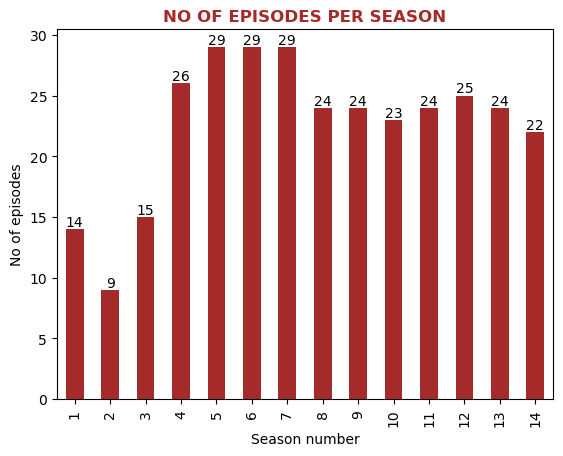

In [19]:
# plots the bar graph
unique_episodes_per_season.plot(kind = 'bar',color='brown')
# places data labels showing the no of episodes
for season, label in enumerate(ep_per_season_labels):
    plt.text(season, ep_per_season_labels[season], label, ha='center', va = "bottom")
# Customizing the plot
plt.title("NO OF EPISODES PER SEASON",fontweight='bold',color='brown')
plt.xlabel('Season number')
plt.ylabel('No of episodes')

In [20]:
# next we find the episode with thee most views

In [21]:
# finds the maximum no of views
max_views = Sharkt.loc[Sharkt['US Viewership'].idxmax()]['US Viewership']
#find the episode with the most no of views
max_views_episode = Sharkt.loc[Sharkt['US Viewership'].idxmax()]['Episode Name']

print('The episode with the most views is: ' + max_views_episode.upper() + ' with ' + str(max_views) + ' million views')

The episode with the most views is: S6EP15 with 8.64 million views


In [22]:
# next we find the season with the most views

In [23]:
# creates a dataframe with only unique episode values and the corresponding views.
Sharkt_unique_episodes = Sharkt.drop_duplicates(subset = "Episode Name")
max_seasonal_views = Sharkt_unique_episodes.groupby('Season Number')['US Viewership'].sum()
print(max_seasonal_views.loc[max_seasonal_views== max_seasonal_views.max()])

Season Number
6    216.74
Name: US Viewership, dtype: float64


In [24]:
# Line chart monitoring number of views by year

In [25]:
#extracts the year of release from the original air date column
Sharkt['Release year'] = Sharkt['Original Air Date'].dt.strftime('%Y')

In [26]:
print(Sharkt['Release year'])

0       2009
1       2009
2       2009
3       2009
4       2009
        ... 
1262    2023
1263    2023
1264    2023
1265    2023
1266    2023
Name: Release year, Length: 1267, dtype: object


In [27]:
# drops repeat episodes from the data creating a unique dataframe 
unique_sharkt = Sharkt.drop_duplicates(subset = 'Episode Name')

In [28]:
print(unique_sharkt)

      Season Number Season Start Season End  Episode Number  Pitch Number  \
0                 1   2009-08-09 2010-02-05               1             1   
5                 1   2009-08-09 2010-02-05               2             6   
10                1   2009-08-09 2010-02-05               3            11   
15                1   2009-08-09 2010-02-05               4            16   
20                1   2009-08-09 2010-02-05               5            21   
...             ...          ...        ...             ...           ...   
1247             14   2022-09-23 2023-05-19              18          1255   
1251             14   2022-09-23 2023-05-19              19          1259   
1255             14   2022-09-23 2023-05-19              20          1263   
1259             14   2022-09-23 2023-05-19              21          1267   
1263             14   2022-09-23 2023-05-19              22          1271   

     Original Air Date      Startup Name           Industry Pitchers Gender

In [29]:
# a series that shows total views per year
Views_by_time = unique_sharkt.groupby('Release year')['US Viewership'].sum() #creates the series
views_per_year_labels = list(Views_by_time) # list of data labels for line plot
print(Views_by_time)

Release year
2009     48.69
2010     17.42
2011     44.45
2012    157.73
2013    180.05
2014    214.72
2015    196.62
2016    157.17
2017    122.09
2018     71.44
2019     87.98
2020     92.92
2021    105.20
2022     87.33
2023     47.85
Name: US Viewership, dtype: float64


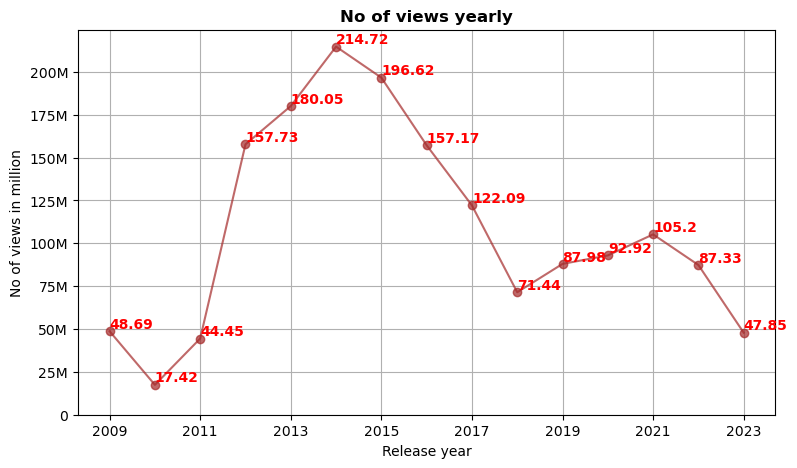

In [30]:
# plots the line graph
plt.figure(figsize=(9,5))
Views_by_time.plot(kind = 'line', color ='brown',marker ='o',alpha = 0.7)
# customizing the plot
plt.ylabel("No of views in million")
plt.title("No of views yearly",fontweight='bold')
plt.grid(True)
# Setting up y axis labels and values
plt.gca().set_yticks([0,25,50,75,100,125,150,175,200]) #sets scale and values
plt.gca().set_yticklabels(['0','25M','50M','75M','100M','125M','150M','175M','200M']) #sets the labels to be shown on the graph
# Adds data labels
for i, labelz in enumerate(views_per_year_labels):
    x = i  # Use the index for x-coordinate
    y = Views_by_time[i]   # Use the 'Y' column for y-coordinate
    plt.text(x, y, labelz, ha='left', va='bottom',color='red',fontweight='bold')

In [31]:
#pitcher gender distribution
gender_split = Sharkt.groupby('Pitchers Gender')['Pitchers Gender'].count()
gender_split_labels = list(gender_split)

<Figure size 800x600 with 0 Axes>

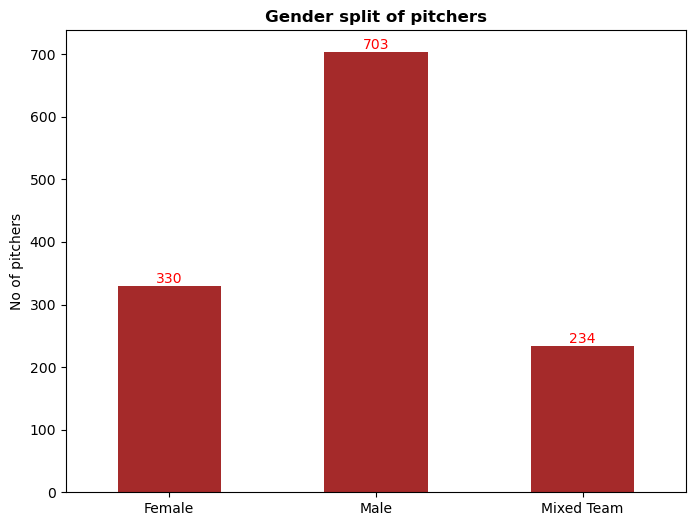

<Figure size 800x600 with 0 Axes>

In [32]:
#plots a graph showing the gender split of pitchers
plt.figure(figsize=(8, 6))
gend = gender_split.plot(kind='bar',color='brown')
plt.title("Gender split of pitchers",fontweight='bold')
plt.ylabel("No of pitchers")
for i,v in enumerate(gender_split):
    plt.text(i,v,str(v),ha='center',va='bottom',color='red')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.figure(figsize = (8,6))

In [33]:
#Industry with the highest presence of male and female pitchers each and industry with the lowest
gender_industry_prefference = Sharkt[['Pitchers Gender','Industry']].groupby(['Industry','Pitchers Gender']).size().unstack(fill_value=0)
print(gender_industry_prefference.loc[gender_industry_prefference['Female'] == gender_industry_prefference['Female'].max()]['Female'])
print(gender_industry_prefference.loc[gender_industry_prefference['Female'] == gender_industry_prefference['Female'].min()]['Female'])
print(gender_industry_prefference.loc[gender_industry_prefference['Male'] == gender_industry_prefference['Male'].max()]['Male'])
print(gender_industry_prefference.loc[gender_industry_prefference['Male'] == gender_industry_prefference['Male'].min()]['Male'])

Industry
Fashion/Beauty    86
Name: Female, dtype: int64
Industry
Automotive        0
Electronics       0
Liquor/Alcohol    0
Name: Female, dtype: int64
Industry
Food and Beverage    139
Name: Male, dtype: int64
Industry
Liquor/Alcohol     8
Uncertain/Other    8
Name: Male, dtype: int64


In [34]:
# TOP 5 JOB INDUSTRY
top_5_industries = Sharkt["Industry"].value_counts().nlargest(5)

In [35]:
print(top_5_industries)

Food and Beverage          274
Lifestyle/Home             225
Fashion/Beauty             217
Children/Education         117
Fitness/Sports/Outdoors    113
Name: Industry, dtype: int64


(-1.101061654256188,
 1.1010333164629922,
 -1.1015376188334232,
 1.1104677059480466)

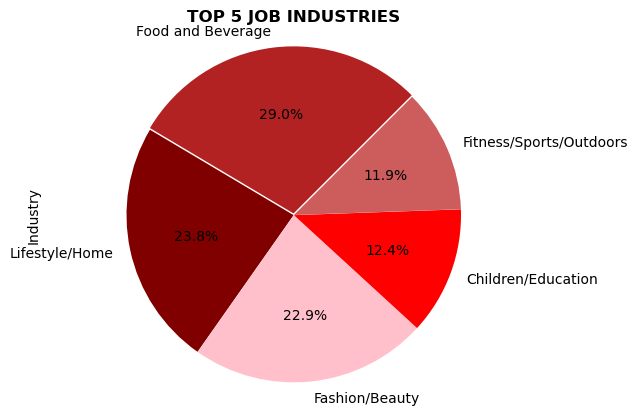

In [36]:
colors = ["firebrick","maroon","pink","red","indianred"]
explode = [0.01,0.001,0.001,0.001,0.001]
labels = ["Food and Beverage","Lifestyle/Home","Fashion/Beauty","Children/Education","Fitness/Sports/Outdoors"]
pie = top_5_industries.plot(kind='pie',colors=colors,autopct = "%1.1f%%",startangle=45,explode=explode,legend=False,labels=labels)
pie.legend().set_visible(False)
plt.title("TOP 5 JOB INDUSTRIES",fontweight='bold')
plt.axis('equal')

In [37]:
top_5_industries_list = dict(top_5_industries)
print(top_5_industries_list)
gender_industry_split = Sharkt[Sharkt['Industry'].isin(top_5_industries_list)][['Pitchers Gender','Industry']]

{'Food and Beverage': 274, 'Lifestyle/Home': 225, 'Fashion/Beauty': 217, 'Children/Education': 117, 'Fitness/Sports/Outdoors': 113}


In [38]:
a = gender_industry_split.groupby(['Industry','Pitchers Gender']).size().unstack(fill_value=0)
print(a)

Pitchers Gender          Female  Male  Mixed Team
Industry                                         
Children/Education           48    39          30
Fashion/Beauty               86    94          37
Fitness/Sports/Outdoors      12    85          16
Food and Beverage            79   139          56
Lifestyle/Home               48   137          40


Text(0, 0.5, 'Number of entreprenuers')

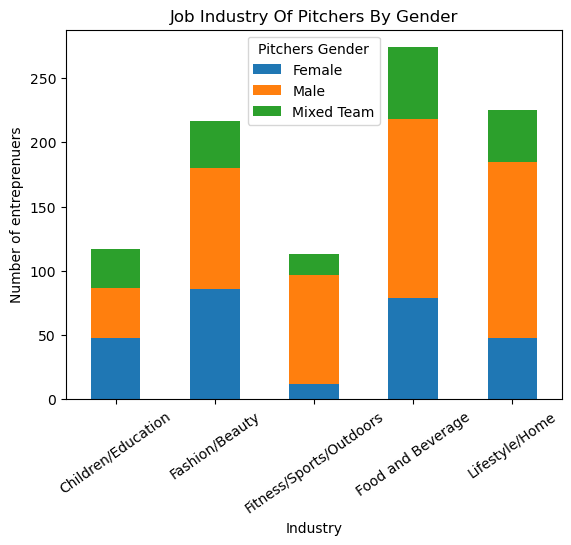

In [39]:
a.plot(kind='bar',stacked=True)
plt.title("Job Industry Of Pitchers By Gender")
plt.xticks(rotation=35)
plt.ylabel("Number of entreprenuers")


In [40]:
Shark_deal_amount = Sharkt[Sharkt['Total Deal Amount'] != 'Did not invest']
display(Shark_deal_amount)

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Company Website,...,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Episode Name,Release month,Release year
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,http://www.avatheelephant.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,http://whybake.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
5,1,2009-08-09,2010-02-05,2,6,2009-08-16,APerfectPear,Food and Beverage,Female,http://www.aperfectpear.com,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep2,Aug,2009
6,1,2009-08-09,2010-02-05,2,7,2009-08-16,ClassroomJams,Children/Education,Male,http://www.attachnoted.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep2,Aug,2009
10,1,2009-08-09,2010-02-05,3,11,2009-08-23,TurboBaster,Food and Beverage,Female,No website,...,100.0,Present,Not present,Not present,Present,Present,Present,s1ep3,Aug,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,14,2022-09-23,2023-05-19,21,1268,2023-05-05,YouGoNatural,Fashion/Beauty,Mixed Team,yougonatural.com,...,Did not Invest,unknown,Present,unknown,unknown,unknown,unknown,s14ep21,May,2023
1262,14,2022-09-23,2023-05-19,21,1270,2023-05-05,NoshiFood,Food and Beverage,Male,noshiforkids.com,...,Did not Invest,unknown,Present,unknown,unknown,unknown,unknown,s14ep21,May,2023
1263,14,2022-09-23,2023-05-19,22,1271,2023-05-19,Tucky,Fashion/Beauty,Female,shoptucky.com,...,Did not Invest,unknown,unknown,unknown,unknown,Present,unknown,s14ep22,May,2023
1265,14,2022-09-23,2023-05-19,22,1273,2023-05-19,Eyewris,Lifestyle/Home,Male,eyewris.com,...,Did not Invest,Present,Present,Present,unknown,Present,Present,s14ep22,May,2023


In [41]:
print("Average total deal amount " + str(Shark_deal_amount['Total Deal Amount'].mean()),"Average total deal equity " + str(Shark_deal_amount['Total Deal Equity'].mean())+ '%',"Average deal valuation " + str(Shark_deal_amount['Deal Valuation'].mean()),sep='\n')

Average total deal amount 295971.2710526316
Average total deal equity 24.29892105263156%
Average deal valuation 2179784.3710526316


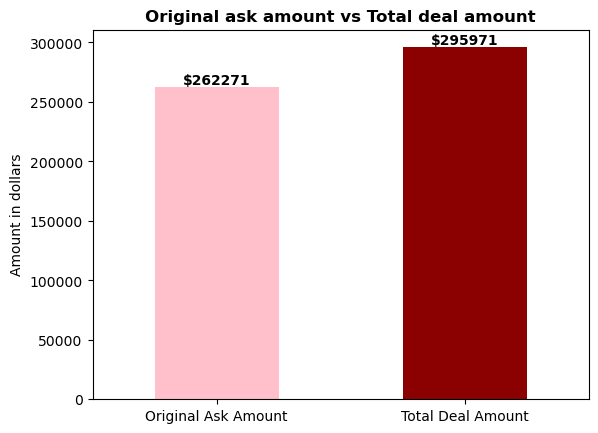

In [42]:
#Difference between offers made and given
Shark_deal_amount[['Original Ask Amount','Total Deal Amount']].mean().plot(kind='bar',color=['pink','darkred'])
plt.xticks(rotation=0)
plt.title('Original ask amount vs Total deal amount',fontweight='bold')
plt.ylabel("Amount in dollars")
for i,v in enumerate(Shark_deal_amount[['Original Ask Amount','Total Deal Amount']].mean()):
    plt.text(i,v,'$' + str(int(v)),fontweight='bold',ha='center',va='bottom')


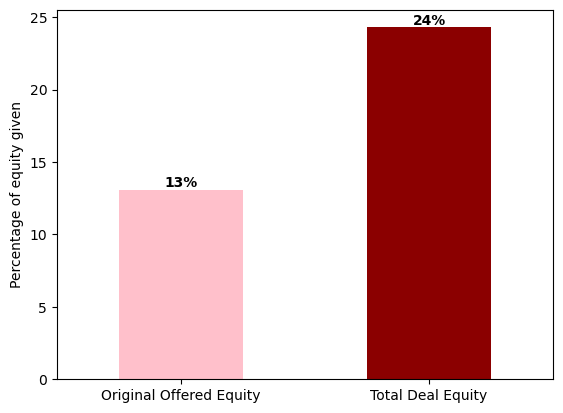

In [43]:
Shark_deal_amount[['Original Offered Equity','Total Deal Equity']].mean().plot(kind='bar',color=['pink','darkred'])
plt.xticks(rotation=0)
plt.ylabel("Percentage of equity given")
for i,v in enumerate(Shark_deal_amount[['Original Offered Equity','Total Deal Equity']].mean()):
    plt.text(i,v,str(int(v)) + '%',fontweight='bold',ha='center',va='bottom')

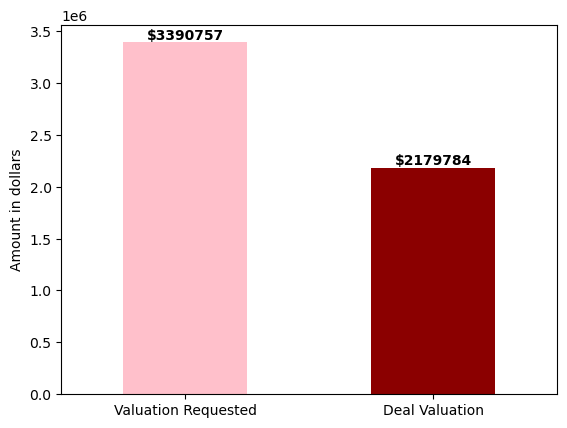

In [44]:
Shark_deal_amount[['Valuation Requested','Deal Valuation']].mean().plot(kind='bar',color=['pink','darkred'])
plt.xticks(rotation=0)
plt.ylabel("Amount in dollars")
for i,v in enumerate(Shark_deal_amount[['Valuation Requested','Deal Valuation']].mean()):
    plt.text(i,v,'$' + str(int(v)),fontweight='bold',ha='center',va='bottom')

Text(0.5, 1.0, 'Investment Amount per Investor')

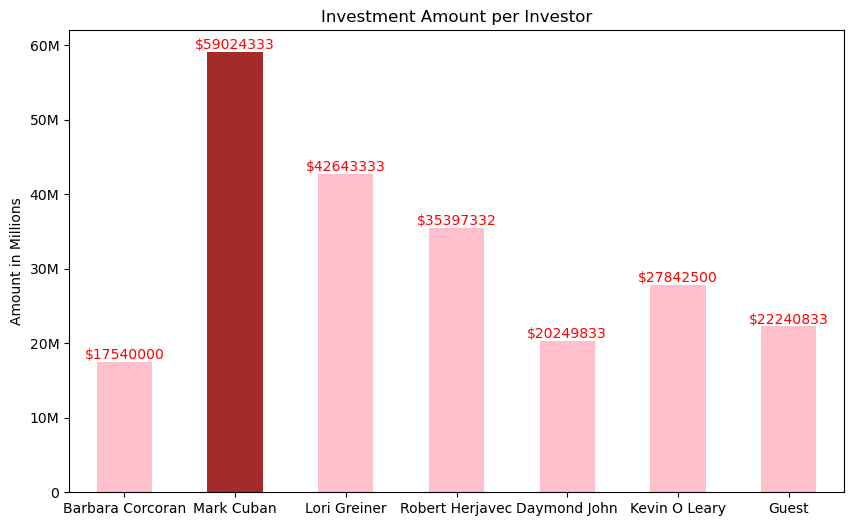

In [45]:
plt.figure(figsize = (10,6))
pd.set_option('display.float_format', '{:.0f}'.format)
Investor_investments = Sharkt[['Barbara Corcoran Investment Amount','Mark Cuban Investment Amount','Lori Greiner Investment Amount','Robert Herjavec Investment Amount','Daymond John Investment Amount','Kevin O Leary Investment Amount','Guest Investment Amount']][Sharkt[['Barbara Corcoran Investment Amount','Mark Cuban Investment Amount','Lori Greiner Investment Amount','Robert Herjavec Investment Amount','Daymond John Investment Amount','Kevin O Leary Investment Amount','Guest Investment Amount']] != "Did not Invest"]
Investor_investments.sum().plot(kind='bar',color=['pink','brown','pink','pink','pink','pink'])
x_value_labels = ['Barbara Corcoran','Mark Cuban','Lori Greiner','Robert Herjavec','Daymond John','Kevin O Leary','Guest']
plt.gca().set_xticklabels(x_value_labels)
plt.xticks(rotation=0)
y_ticks = [0,10000000, 20000000, 30000000, 40000000, 50000000,60000000]
y_labels = ['0','10M', '20M', '30M', '40M', '50M','60M']
plt.yticks(y_ticks,y_labels)
plt.ylabel('Amount in Millions')
for i,v in enumerate(Investor_investments.sum()):
    plt.text(i,v,'$' + str(int(v)),ha='center',va='bottom',color='red')
plt.title('Investment Amount per Investor')


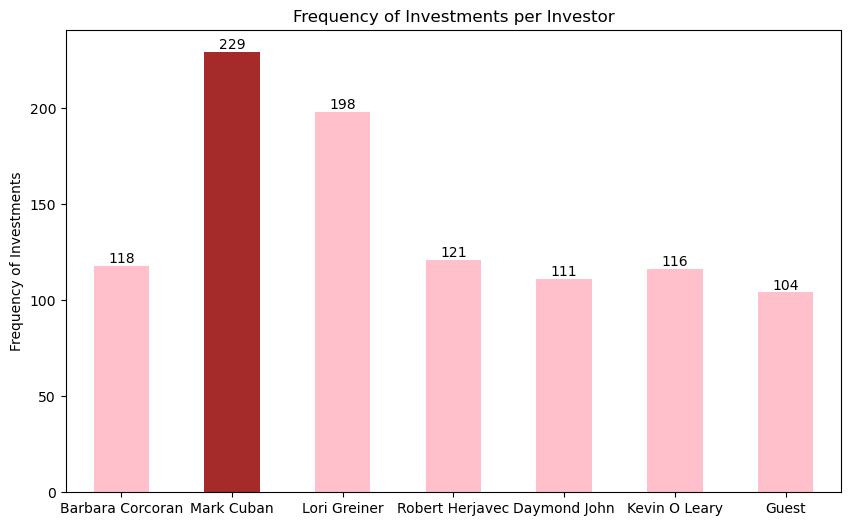

In [46]:
plt.figure(figsize=(10,6))
Investor_investments.count().plot(kind='bar',color=['pink','brown','pink','pink','pink','pink']) #How many times each investor invested
plt.title('Frequency of Investments per Investor')
plt.ylabel('Frequency of Investments')
x_value_labels = ['Barbara Corcoran','Mark Cuban','Lori Greiner','Robert Herjavec','Daymond John','Kevin O Leary','Guest']
plt.gca().set_xticklabels(x_value_labels)
plt.xticks(rotation=0)
for i,v in enumerate(Investor_investments.count()):
    plt.text(i,v,str(v),ha='center',va='bottom',color='black')

In [47]:
# Creating fact and dimension tables for easier analysis

In [48]:
pd.set_option('display.max_columns', None)
Sharkt.head()

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Episode Name,Release month,Release year
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,http://www.avatheelephant.com/,0,4,50000,15,333333,YES,50000,55,90909,1,50000,55,Advisory deal,No loan,50000,55,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,http://whybake.com/,0,4,460000,10,4600000,YES,460000,50,920000,2,230000,25,Advisory deal,No loan,230000,25,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,230000,25,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,http://www.wispots.com/,0,4,1200000,10,12000000,NO,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Advisory deal,No loan,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,http://collegehunkshaulingjunk.com/,0,4,250000,25,1000000,NO,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Advisory deal,No loan,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,No website,0,4,1000000,15,6666667,NO,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Advisory deal,No loan,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,Aug,2009


In [49]:
# To make finding column names easier
List_Of_Columns = Sharkt.columns.to_list()
print(List_Of_Columns)

['Season Number', 'Season Start', 'Season End', 'Episode Number', 'Pitch Number', 'Original Air Date', 'Startup Name', 'Industry', 'Pitchers Gender', 'Company Website', 'Multiple Entrepreneurs', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested', 'Got Deal', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of sharks in deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan', 'Barbara Corcoran Investment Amount', 'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount', 'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount', 'Robert Herjavec Investment Equity', 'Daymond John Investment Amount', 'Daymond John Investment Equity', 'Kevin O Leary Investment Amount', 'Kevin O Leary Investment Equity', 'Guest Investment Amount', 'Guest Investment Equity', 'Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Pr

In [50]:
# Season fact table
Season_fact_table = Sharkt[['Original Air Date','Season Number','Season Start','Season End']].drop_duplicates(subset=["Season Number"])
print(Season_fact_table)
Season_fact_table.to_csv('Season_fact_table.csv',index = False)

     Original Air Date  Season Number Season Start Season End
0           2009-08-09              1   2009-08-09 2010-02-05
64          2011-03-20              2   2011-03-20 2011-05-13
100         2012-01-20              3   2012-01-20 2012-05-18
160         2012-09-14              4   2012-09-14 2013-05-17
263         2013-09-20              5   2013-09-20 2014-05-16
379         2014-09-26              6   2014-09-26 2015-05-15
495         2015-09-25              7   2015-09-25 2016-05-20
611         2016-09-23              8   2016-09-23 2017-05-12
707         2017-10-01              9   2017-10-01 2018-02-25
803         2018-10-07             10   2018-10-07 2019-05-12
895         2019-09-29             11   2019-09-29 2020-05-15
991         2020-10-16             12   2020-10-16 2021-05-21
1086        2021-10-08             13   2021-10-08 2022-05-20
1180        2022-09-23             14   2022-09-23 2023-05-19


In [56]:
# Pitcher dimension table
Pitcher_dimension_table = Sharkt.loc[:,['Original Air Date','Season Number','Episode Name','Startup Name','Industry','Pitchers Gender','Company Website','Multiple Entrepreneurs']]
Pitcher_dimension_table["Multiple Entrepreneurs"] = Pitcher_dimension_table["Multiple Entrepreneurs"].replace(0,"NO")
Pitcher_dimension_table["Multiple Entrepreneurs"] = Pitcher_dimension_table["Multiple Entrepreneurs"].replace(1,"YES")
Pitcher_dimension_table["Multiple Entrepreneurs"] = Pitcher_dimension_table["Multiple Entrepreneurs"].fillna("NA")
Pitcher_dimension_table.to_csv('Pitcher_dimension_table.csv',index = False)

In [52]:
# Investor dimension table

In [57]:
Investor_dimension_table = Sharkt[['Original Air Date','Season Number','Episode Name','Barbara Corcoran Investment Amount', 'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount', 'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount', 'Robert Herjavec Investment Equity', 'Daymond John Investment Amount', 'Daymond John Investment Equity', 'Kevin O Leary Investment Amount', 'Kevin O Leary Investment Equity','Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 'Daymond John Present', 'Kevin O Leary Present']]
Investor_dimension_table.to_csv('Investor_dimension_table.csv',index = False)

In [58]:
# Investment dimension table
Investment_dimension_table = Sharkt[['Pitchers Gender','Original Air Date','Season Number','Episode Name', 'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested', 'Got Deal', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of sharks in deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan']]
Investment_dimension_table.to_csv("Investment_dimension_table.csv",index = False)

In [59]:
# Episode dimension table
Episode_dimension_table =  Sharkt[['Original Air Date','Season Number','Episode Name','US Viewership']].drop_duplicates(subset = 'Episode Name')
Episode_dimension_table.to_csv("Episode_dimension_table.csv",index = False)

In [ ]:
import panel as pn
